In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
# import pickle

In [3]:
game_state = {'round': 1,
'step': 1,
'field': np.array([[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1],
[-1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, -1],
[-1, 0, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1, 0, -1],
[-1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, -1],
[-1, 0, -1, 0, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1],
[-1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, -1],
[-1, 0, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1, 0, -1],
[-1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, -1],
[-1, 0, -1, 0, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1],
[-1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, -1],
[-1, 0, -1, 0, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1],
[-1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, -1],
[-1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1],
[-1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, -1],
[-1, 0, -1, 0, -1, 1, -1, 0, -1, 0, -1, 0, -1, 0, -1, 0, -1],
[-1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, -1],
[-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1]]),
'self': ('agent_006_approx_q', 0, True, (1, 15)),
'others': [('rule_based_agent_0', 0, True, (1, 2)), ('rule_based_agent_1', 0, True, (14, 13)), ('rule_based_agent_2', 0, True, (15, 1))],
'bombs': [((4, 7), 3), ((1, 7), 1)],
'coins': [(2, 5), (8, 15)],
'user_input': 'WAIT',
'explosion_map': np.array([
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
    [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]
])} 

In [4]:
def state_to_features(game_state: dict) -> np.array:
    X = np.zeros((17, 17, 8), dtype=bool)

    if game_state == None: return X

    # material
    X[game_state["field"] == -1, 0] = True
    X[game_state["field"] == 0, 1] = True
    X[game_state["field"] == 1, 2] = True

    # explosion
    X[game_state["explosion_map"] > 0, 3] = True
    
    # add bomb countdowns for every field
    for bomb in game_state["bombs"]: X[bomb[0][0], bomb[0][1], 4] = True

    # add coin bool for every field
    for coin in game_state["coins"]: X[coin[0], coin[1], 5] = True

    # add agent info (self) for every field
    X[game_state["self"][3][0], game_state["self"][3][1], 6] = True

    # add agent info (opponent) for every field
    for opponent in game_state["others"]: X[opponent[3][0], opponent[3][1], 7] = True

    return X[1:-1, 1:-1, :]

In [5]:
def transform_state(t, s, a, s_=None):
    # ACTIONS = ['UP', 'RIGHT', 'DOWN', 'LEFT', 'WAIT', 'BOMB']

    # mirror x -> -x
    if t == 0:
        s = np.flip(s, axis=1)
        if s_ != None:
            s_ = np.flip(s_, axis=1)
        # switch left, right
        a = [0, 3, 2, 1, 4, 5][a]
    # mirror y -> -y
    elif t == 1:
        s = np.flip(s, axis=0)
        if s_ != None:
            s_ = np.flip(s_, axis=0)
        # switch up, down
        a = [2, 1, 0, 3, 4, 5][a]
    # mirror point
    elif t == 2:
        s = np.flip(np.flip(s, axis=0), axis=1)
        if s_ != None:
            s_ = np.flip(np.flip(s_, axis=0), axis=1)
        # switch up, down and left, right
        a = [2, 3, 0, 1, 4, 5][a]
    # transpose
    elif t == 3:
        s = np.transpose(s, axes=(1, 0, 2))
        if s_ != None:
            s_ = np.transpose(s_, axes=(1, 0, 2))
        # switch up, left and down, right
        a = [3, 2, 1, 0, 4, 5][a]
    # rotate left
    elif t == 4:
        s = np.rot90(s, 1)
        if s_ != None:
            s_ = np.rot90(s, 1)
        # rotate left
        a = [3, 0, 1, 2, 4, 5][a]
    # rotate right
    elif t == 5:
        s = np.rot90(s, -1)
        if s_ != None:
            s_ = np.rot90(s, -1)
        # rotate right
        a = [1, 2, 3, 0, 4, 5][a]
    
    return s, a, s_

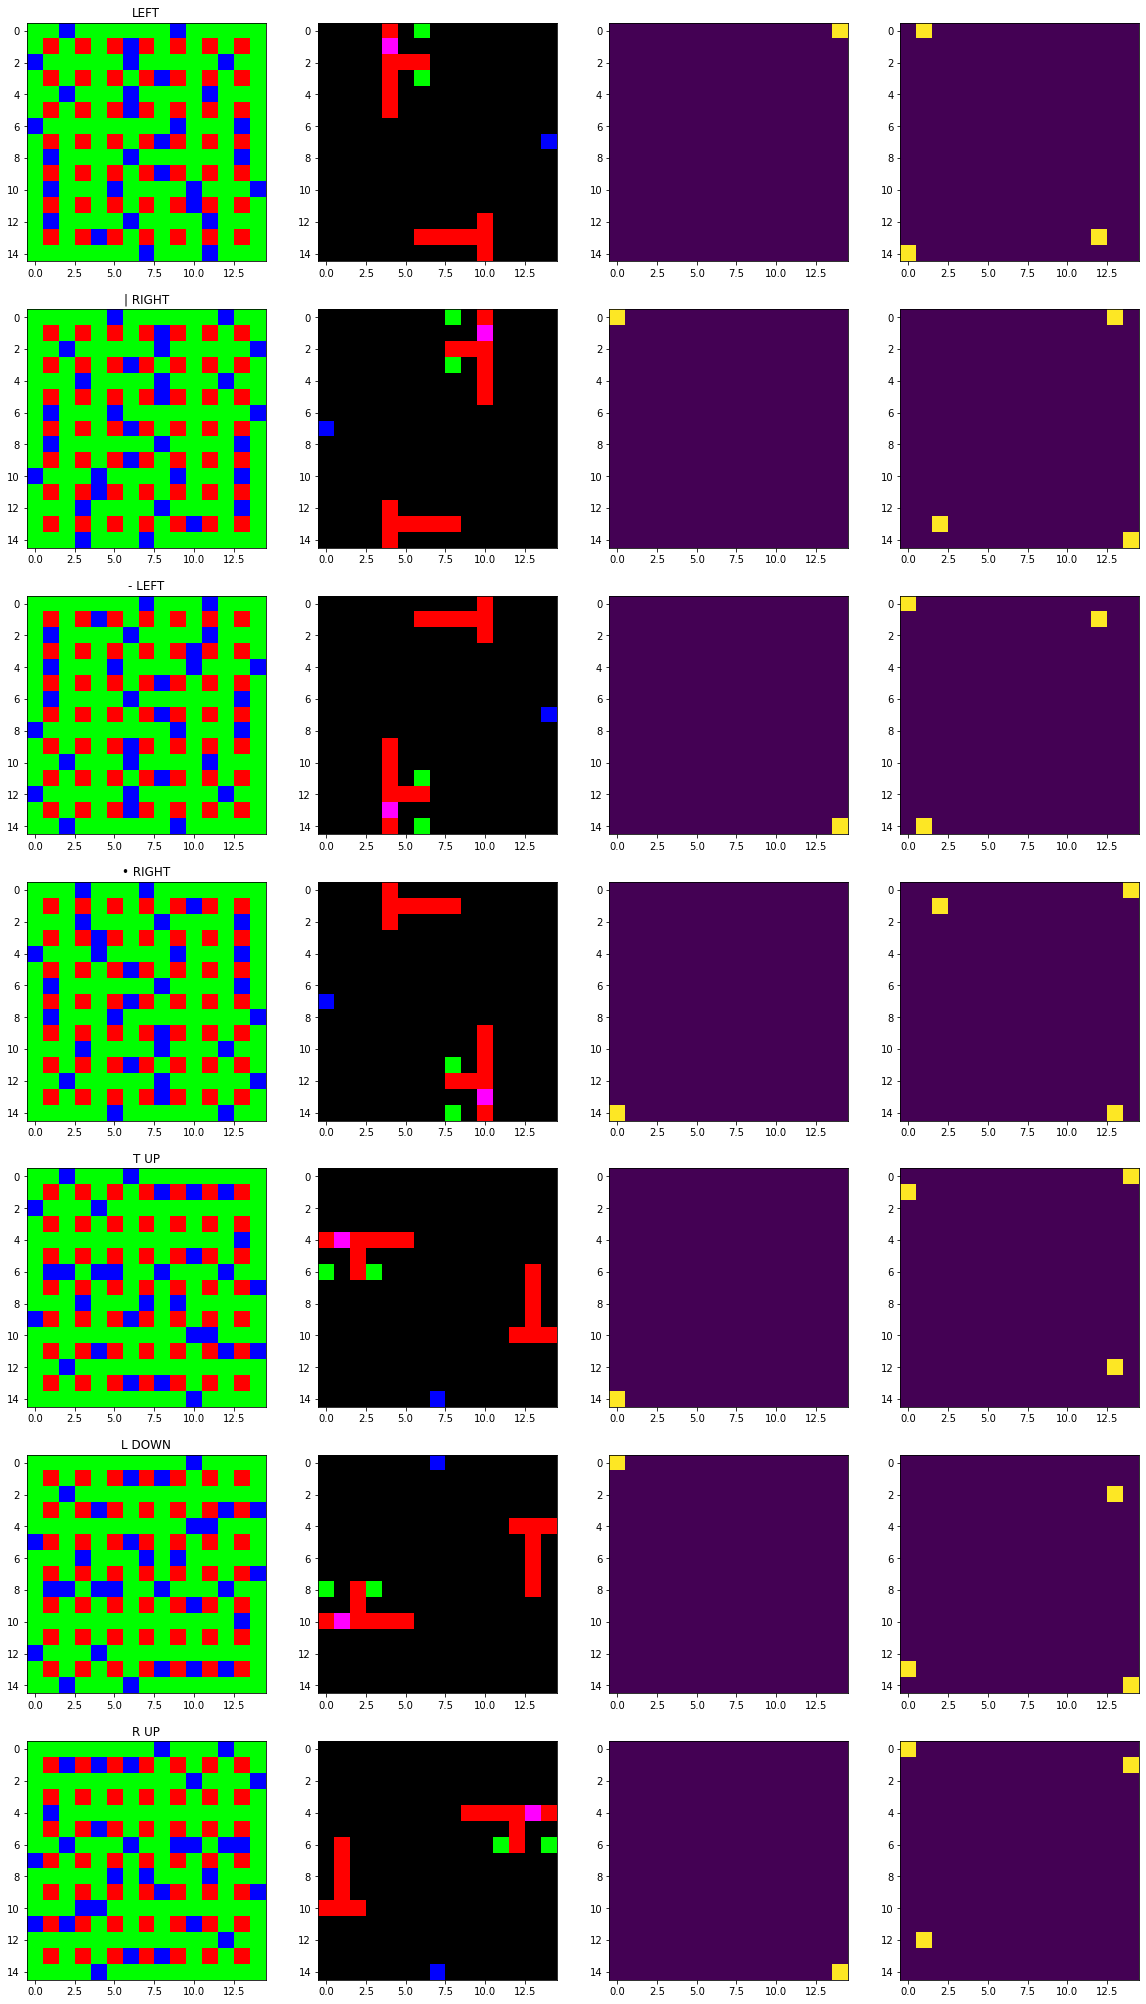

In [8]:
fig, ax = plt.subplots(7, 4, figsize=(20, 36))

ACTIONS = ["UP", "RIGHT", "DOWN", "LEFT", "WAIT", "BOMB"]
TRANDFOMRATIONS = ["|", "-", "•", "T", "L", "R" ]

s = state_to_features(game_state)
a = 3
ax[0][0].imshow(s.astype(np.float32)[:, :, :3])
ax[0][1].imshow(s.astype(np.float32)[:, :, 3:6])
ax[0][2].imshow(s.astype(np.float32)[:, :, 6])
ax[0][3].imshow(s.astype(np.float32)[:, :, 7])
ax[0][0].set_title(ACTIONS[a])

for i in range(6):
    st, at, _ = transform_state(i, s, a)

    ax[i+1][0].imshow(st.astype(np.float32)[:, :, :3])
    ax[i+1][1].imshow(st.astype(np.float32)[:, :, 3:6])
    ax[i+1][2].imshow(st.astype(np.float32)[:, :, 6])
    ax[i+1][3].imshow(st.astype(np.float32)[:, :, 7])
    ax[i+1][0].set_title(TRANDFOMRATIONS[i] + " " + ACTIONS[at]);